<a href="https://colab.research.google.com/github/jaeseo3/pancreatitis/blob/main/Save_image_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install SimpleITK
!pip install pydicom
!pip install dicom2nifti
!pip install nii2png
!pip install med2image

In [14]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os
from itertools import groupby
from operator import itemgetter
from pathlib import Path # pathlib for easy path handling
import dicom2nifti # to convert DICOM files to the NIftI format
import nibabel as nib # nibabel to handle nifti files
import SimpleITK as sitk
import med2image
import glob
from PIL import Image
import cv2

In [15]:
def slice_generator(nifti_path):
    nifti_image = nib.load(nifti_path)
    nifti_data = nifti_image.get_fdata()
    for slice_idx in range(nifti_data.shape[2]):
        yield nifti_data[:, :, slice_idx]

In [16]:
readfolderT = glob.glob('/content/drive/MyDrive/pancreas/image/*.nii.gz')
readfolderL = glob.glob('/content/drive/MyDrive/pancreas/label/*.nii.gz')

readfolderT.sort()
readfolderL.sort()

In [17]:
def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max

    return window_image

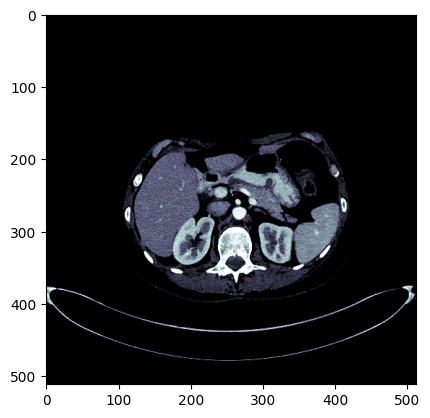

240


In [38]:
# bring slice by slice
# rotate 90 counterclockwise
# resize to new_size and save

new_size = (128, 128)

sum = 0

for i in range(len(readfolderT)):
  nifti_path = readfolderT[i]
  for slice in slice_generator(nifti_path):
    temp = window_image(slice, 40, 400)
    temp = Image.fromarray(temp)
    temp = temp.rotate(90)
    temp = temp.convert("L")
    temp = temp.resize(new_size)
    imageio.imsave('/content/drive/MyDrive/pancreas/image_2d/'+str(sum)+'.png',temp)
    sum += 1

print(sum)

In [12]:
# bring slice by slice
# rotate 90 counterclockwise
# resize to new_size and save

new_size = (128, 128)

sum = 0

for i in range(len(readfolderL)):
  nifti_path = readfolderL[i]
  for slice in slice_generator(nifti_path):
    temp = Image.fromarray(slice)
    temp = temp.point(lambda p: p * 255)
    temp = temp.rotate(90)
    temp = temp.convert("L")
    temp = temp.resize(new_size)
    imageio.imsave('/content/drive/MyDrive/pancreas/label_2d/'+str(sum)+'.png',temp)
    sum += 1

print(sum)

18942


In [18]:
# bring slice by slice
# rotate 90 counterclockwise
# resize to new_size and save

new_size = (224, 224)

sum = 0

for i in range(len(readfolderT)):
  nifti_path = readfolderT[i]
  for slice in slice_generator(nifti_path):
    temp = window_image(slice, 40, 400)
    temp = Image.fromarray(temp)
    temp = temp.rotate(90)
    temp = temp.convert("L")
    temp = temp.resize(new_size)
    imageio.imsave('/content/drive/MyDrive/pancreas/image_224/'+str(sum)+'.png',temp)
    sum += 1

print(sum)

FileNotFoundError: ignored

In [19]:
# bring slice by slice
# rotate 90 counterclockwise
# resize to new_size and save

new_size = (224, 224)

sum = 0

for i in range(len(readfolderL)):
  nifti_path = readfolderL[i]
  for slice in slice_generator(nifti_path):
    temp = Image.fromarray(slice)
    temp = temp.point(lambda p: p * 255)
    temp = temp.rotate(90)
    temp = temp.convert("L")
    temp = temp.resize(new_size)
    imageio.imsave('/content/drive/MyDrive/pancreas/label_224/'+str(sum)+'.png',temp)
    sum += 1

print(sum)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')